# YOLOv11 Training Notebook - IR

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/user/Shivam/dsr_project/Project_files


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (32 CPUs, 125.5 GB RAM, 1766.4/1832.2 GB disk)


## Load Pretrained YOLO v11n model and Validate

In [3]:
from ultralytics import YOLO
from PIL import Image

# Load the YOLO model
model = YOLO('yolo11n.pt')

# Open the local image file
image = Image.open(r'/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/images/test/flir_2208.jpg')

# Perform prediction
result = model.predict(image, conf=0.25)[0]


0: 480x640 1 traffic light, 29.7ms
Speed: 3.9ms preprocess, 29.7ms inference, 69.3ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
result.boxes.xyxy

tensor([[3.1270e+02, 7.2409e-02, 3.4096e+02, 1.7373e+01]], device='cuda:0')

In [5]:
result.boxes.conf

tensor([0.3932], device='cuda:0')

In [6]:
result.boxes.cls

tensor([9.], device='cuda:0')

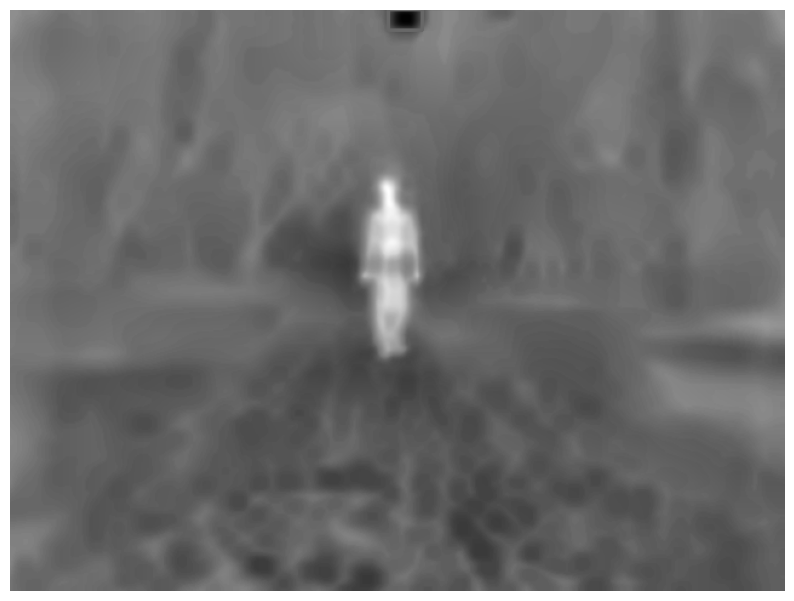

In [7]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Dataset preparation

In [8]:
import yaml
from pathlib import Path

# === CONFIGURATION ===
dataset_root = Path("/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled")  # dataset root
yaml_save_path = dataset_root / "data.yaml"

# Define class names
class_names = [
    "Person", "Car", "Vehicle_Other", "JCB", "Two_Wheeler", "Dont_Care"
]

# YAML structure
data = {
    "path": str(dataset_root),  # root path to dataset
    "train": "images/train",    # relative paths
    "val": "images/val",
    "test": "images/test",
    "names": {i: name for i, name in enumerate(class_names)}  # index:name format
}

# Write YAML
with open(yaml_save_path, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print(f"✅ YOLOv11-compatible data.yaml created at: {yaml_save_path}")

✅ YOLOv11-compatible data.yaml created at: /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml


## Training YOLO v11n Model

In [9]:
from ultralytics import YOLO

# Load a pretrained YOLOv11 model (nano version)
model = YOLO('yolo11n.pt')

# Train the model
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml",  
    epochs=100,
    imgsz=640,
    batch=32,
    name='train',  # subfolder name under yolov11_rgb
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir",
    workers=4,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train... 22096 images, 1421 backgrounds, 0 corrupt: 100%|██████████| 22096/22096 [00:11<00:00, 1973.91it/s]


train: New cache created: /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train.cache


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val... 6313 images, 392 backgrounds, 0 corrupt: 100%|██████████| 6313/6313 [00:03<00:00, 1881.30it/s]


val: New cache created: /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val.cache
Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.3G      1.572      2.086      1.255         79        640: 100%|██████████| 691/691 [01:22<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:32<00:00,  3.07it/s]


                   all       6313      22790      0.807      0.618      0.633      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.27G      1.431      1.232      1.145         96        640: 100%|██████████| 691/691 [01:22<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:32<00:00,  3.06it/s]


                   all       6313      22790      0.845      0.633      0.668      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.79G      1.442        1.1      1.137        114        640: 100%|██████████| 691/691 [01:16<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:32<00:00,  3.05it/s]


                   all       6313      22790      0.774      0.548      0.564      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.42G      1.441       1.02      1.147         75        640: 100%|██████████| 691/691 [01:16<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:31<00:00,  3.15it/s]

                   all       6313      22790      0.835      0.632       0.67      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.13G      1.381     0.9107      1.119        104        640: 100%|██████████| 691/691 [01:18<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:31<00:00,  3.18it/s]

                   all       6313      22790      0.694      0.666      0.708      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.64G       1.34     0.8553        1.1        104        640: 100%|██████████| 691/691 [01:18<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:30<00:00,  3.24it/s]

                   all       6313      22790       0.71      0.654      0.705      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.58G      1.303     0.8111      1.083        112        640: 100%|██████████| 691/691 [01:22<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:30<00:00,  3.27it/s]

                   all       6313      22790      0.902      0.696      0.772      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.56G      1.288     0.7911      1.079         79        640: 100%|██████████| 691/691 [01:22<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:29<00:00,  3.32it/s]

                   all       6313      22790      0.892      0.699      0.744      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.64G      1.269     0.7654      1.072         70        640: 100%|██████████| 691/691 [01:18<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:29<00:00,  3.40it/s]

                   all       6313      22790      0.895      0.703      0.748      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.71G      1.249       0.75       1.06         81        640: 100%|██████████| 691/691 [01:23<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:28<00:00,  3.46it/s]

                   all       6313      22790      0.908      0.715      0.767      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.64G      1.236      0.735      1.057         78        640: 100%|██████████| 691/691 [01:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:28<00:00,  3.47it/s]

                   all       6313      22790      0.903       0.71      0.769      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.43G      1.222     0.7203       1.05         58        640: 100%|██████████| 691/691 [01:19<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:27<00:00,  3.61it/s]

                   all       6313      22790      0.911       0.72      0.815      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.95G      1.212     0.7142      1.049         84        640: 100%|██████████| 691/691 [01:24<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:27<00:00,  3.61it/s]

                   all       6313      22790      0.853      0.796      0.812      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.41G      1.198     0.7007       1.04         82        640: 100%|██████████| 691/691 [01:26<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:26<00:00,  3.70it/s]

                   all       6313      22790      0.874      0.775      0.816      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.36G      1.193      0.693      1.039        111        640: 100%|██████████| 691/691 [01:21<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:25<00:00,  3.81it/s]

                   all       6313      22790      0.888      0.774      0.825      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.82G       1.18     0.6843      1.033        112        640: 100%|██████████| 691/691 [01:21<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:26<00:00,  3.80it/s]

                   all       6313      22790       0.87      0.788      0.819      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.32G      1.177      0.677      1.031         68        640: 100%|██████████| 691/691 [01:23<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:25<00:00,  3.86it/s]

                   all       6313      22790      0.909      0.789      0.831      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.57G      1.167     0.6692      1.027        119        640: 100%|██████████| 691/691 [01:28<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:24<00:00,  3.98it/s]

                   all       6313      22790      0.901      0.794      0.836      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.43G      1.153     0.6616      1.024         93        640: 100%|██████████| 691/691 [01:24<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:24<00:00,  4.06it/s]

                   all       6313      22790      0.902      0.797      0.838        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.35G      1.152     0.6544      1.021        119        640: 100%|██████████| 691/691 [01:25<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:24<00:00,  4.08it/s]

                   all       6313      22790      0.911      0.797      0.836      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.72G      1.144     0.6528      1.017         83        640: 100%|██████████| 691/691 [01:23<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:23<00:00,  4.20it/s]

                   all       6313      22790      0.906      0.796      0.838      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.06G      1.138     0.6466      1.013        116        640: 100%|██████████| 691/691 [01:25<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:22<00:00,  4.37it/s]

                   all       6313      22790       0.91      0.796      0.839      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.33G      1.131     0.6418      1.011         84        640: 100%|██████████| 691/691 [01:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:22<00:00,  4.32it/s]

                   all       6313      22790      0.911      0.799      0.843      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.87G      1.134     0.6386      1.012         74        640: 100%|██████████| 691/691 [01:30<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:22<00:00,  4.45it/s]

                   all       6313      22790      0.874      0.808      0.837      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.48G      1.122     0.6316      1.006        100        640: 100%|██████████| 691/691 [01:26<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:21<00:00,  4.58it/s]

                   all       6313      22790      0.902      0.796      0.843      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.78G      1.119     0.6295      1.005         96        640: 100%|██████████| 691/691 [01:29<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:21<00:00,  4.69it/s]

                   all       6313      22790      0.909      0.808      0.844      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.36G      1.112      0.623      1.004         62        640: 100%|██████████| 691/691 [01:28<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:20<00:00,  4.76it/s]

                   all       6313      22790       0.91      0.806      0.845      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.32G      1.111     0.6216      1.002         87        640: 100%|██████████| 691/691 [01:26<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:20<00:00,  4.82it/s]

                   all       6313      22790      0.913      0.809       0.85      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.4G      1.103     0.6146     0.9986         99        640: 100%|██████████| 691/691 [01:26<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:20<00:00,  4.92it/s]

                   all       6313      22790      0.911      0.812      0.851      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.35G      1.095     0.6101     0.9957         78        640: 100%|██████████| 691/691 [01:27<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:19<00:00,  5.01it/s]

                   all       6313      22790      0.907      0.816       0.85      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.32G      1.086     0.6041     0.9913         78        640: 100%|██████████| 691/691 [01:27<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:19<00:00,  4.96it/s]

                   all       6313      22790      0.912      0.812      0.853      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.08G      1.087      0.603     0.9924         68        640: 100%|██████████| 691/691 [01:35<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:19<00:00,  5.14it/s]

                   all       6313      22790      0.921      0.817       0.86      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.15G      1.082     0.6023     0.9913        130        640: 100%|██████████| 691/691 [01:30<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:19<00:00,  5.11it/s]

                   all       6313      22790      0.912      0.813      0.859      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       5.5G      1.076     0.5949     0.9852        130        640: 100%|██████████| 691/691 [01:28<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.28it/s]

                   all       6313      22790      0.913      0.814      0.855      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.53G      1.071     0.5921     0.9859        137        640: 100%|██████████| 691/691 [01:36<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.25it/s]

                   all       6313      22790      0.916      0.811      0.857      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.28G      1.072     0.5896     0.9854         88        640: 100%|██████████| 691/691 [01:28<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:19<00:00,  5.19it/s]

                   all       6313      22790      0.934      0.812      0.857      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.36G      1.068     0.5918     0.9842         59        640: 100%|██████████| 691/691 [01:30<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.37it/s]

                   all       6313      22790      0.911      0.818      0.857      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.34G      1.064     0.5867     0.9837         77        640: 100%|██████████| 691/691 [01:28<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.43it/s]

                   all       6313      22790      0.915      0.816      0.857      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.28G      1.057     0.5825     0.9786        100        640: 100%|██████████| 691/691 [01:29<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.40it/s]

                   all       6313      22790      0.898      0.818      0.857       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.38G      1.051     0.5737     0.9789         91        640: 100%|██████████| 691/691 [01:30<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.63it/s]

                   all       6313      22790      0.904      0.818      0.859       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.28G      1.052     0.5782     0.9787         91        640: 100%|██████████| 691/691 [01:37<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.64it/s]

                   all       6313      22790      0.904       0.82      0.859      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.34G      1.046     0.5728     0.9761         97        640: 100%|██████████| 691/691 [01:29<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.62it/s]

                   all       6313      22790      0.902       0.82      0.859      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.34G      1.042     0.5697     0.9736         81        640: 100%|██████████| 691/691 [01:37<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.64it/s]

                   all       6313      22790      0.905      0.821       0.86      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.34G      1.039     0.5676      0.974         65        640: 100%|██████████| 691/691 [01:31<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.52it/s]

                   all       6313      22790      0.906      0.822      0.859      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.61G      1.036     0.5639     0.9717        127        640: 100%|██████████| 691/691 [01:29<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.48it/s]

                   all       6313      22790       0.91      0.818       0.86      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.32G      1.029     0.5608     0.9676         95        640: 100%|██████████| 691/691 [01:29<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.49it/s]

                   all       6313      22790      0.908      0.821       0.86      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.37G      1.025     0.5579     0.9678         89        640: 100%|██████████| 691/691 [01:33<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.59it/s]

                   all       6313      22790      0.912       0.82       0.86      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.58G      1.025     0.5579     0.9669         80        640: 100%|██████████| 691/691 [01:37<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.60it/s]

                   all       6313      22790      0.912       0.82      0.861      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.32G      1.019     0.5531     0.9666         72        640: 100%|██████████| 691/691 [01:29<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.60it/s]

                   all       6313      22790      0.914       0.82      0.861      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       5.1G      1.021     0.5548     0.9663         90        640: 100%|██████████| 691/691 [01:29<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.61it/s]

                   all       6313      22790       0.91      0.824      0.862      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.64G      1.015     0.5481     0.9629        106        640: 100%|██████████| 691/691 [01:29<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.44it/s]

                   all       6313      22790      0.911      0.824      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.05G      1.014     0.5477     0.9625        130        640: 100%|██████████| 691/691 [01:29<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.61it/s]

                   all       6313      22790      0.909      0.826      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.42G      1.009     0.5442     0.9626         85        640: 100%|██████████| 691/691 [01:32<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.46it/s]

                   all       6313      22790      0.911      0.825      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.13G      1.013     0.5456     0.9627        110        640: 100%|██████████| 691/691 [01:29<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.46it/s]

                   all       6313      22790      0.913      0.824      0.862       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.58G          1     0.5386     0.9583        129        640: 100%|██████████| 691/691 [01:35<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.65it/s]

                   all       6313      22790      0.912      0.824      0.862       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.62G     0.9997      0.541     0.9592         84        640: 100%|██████████| 691/691 [01:29<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.61it/s]

                   all       6313      22790      0.912      0.824      0.862      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.37G     0.9949      0.535      0.955         83        640: 100%|██████████| 691/691 [01:31<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.60it/s]

                   all       6313      22790      0.911      0.824      0.863       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.58G     0.9902     0.5322     0.9552        115        640: 100%|██████████| 691/691 [01:29<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.64it/s]

                   all       6313      22790      0.909      0.826      0.863      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.36G     0.9912     0.5342      0.955        102        640: 100%|██████████| 691/691 [01:29<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.50it/s]

                   all       6313      22790      0.908      0.828      0.863      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.35G     0.9897     0.5298     0.9539         80        640: 100%|██████████| 691/691 [01:29<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:17<00:00,  5.59it/s]

                   all       6313      22790      0.908      0.828      0.863      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.55G     0.9898     0.5305     0.9535         93        640: 100%|██████████| 691/691 [00:56<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.03it/s]

                   all       6313      22790      0.908      0.827      0.863      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.42G     0.9818     0.5246     0.9517         71        640: 100%|██████████| 691/691 [00:52<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 13.99it/s]

                   all       6313      22790      0.908      0.829      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.33G     0.9804     0.5236     0.9504         85        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.13it/s]

                   all       6313      22790      0.907      0.829      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.18G     0.9794     0.5236     0.9517        101        640: 100%|██████████| 691/691 [00:46<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:06<00:00, 14.16it/s]

                   all       6313      22790      0.904      0.831      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.62G     0.9671     0.5175      0.947        104        640: 100%|██████████| 691/691 [00:46<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 13.95it/s]

                   all       6313      22790      0.905      0.831      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.09G     0.9718     0.5179      0.949         79        640: 100%|██████████| 691/691 [00:46<00:00, 14.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.14it/s]

                   all       6313      22790      0.904      0.832      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.77G     0.9623     0.5113     0.9447        169        640: 100%|██████████| 691/691 [00:46<00:00, 14.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.10it/s]

                   all       6313      22790       0.91      0.827      0.864      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.09G     0.9622     0.5132     0.9455        135        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.02it/s]

                   all       6313      22790      0.911      0.827      0.864      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.35G     0.9543     0.5079     0.9421        105        640: 100%|██████████| 691/691 [00:46<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.10it/s]

                   all       6313      22790       0.91      0.827      0.865      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.15G     0.9557     0.5071     0.9439        145        640: 100%|██████████| 691/691 [00:46<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:06<00:00, 14.16it/s]

                   all       6313      22790       0.91      0.828      0.865      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.14G     0.9505     0.5046     0.9417        150        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.04it/s]

                   all       6313      22790       0.91      0.829      0.865      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.37G     0.9476     0.5027     0.9396         83        640: 100%|██████████| 691/691 [00:46<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.13it/s]

                   all       6313      22790       0.91      0.828      0.865      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       5.6G     0.9449     0.5021     0.9396         99        640: 100%|██████████| 691/691 [00:46<00:00, 14.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:06<00:00, 14.15it/s]

                   all       6313      22790       0.91      0.828      0.865      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       5.3G     0.9345     0.4957      0.937         79        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.06it/s]

                   all       6313      22790      0.911      0.829      0.865      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.42G     0.9344     0.4931     0.9347         96        640: 100%|██████████| 691/691 [00:46<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:06<00:00, 14.20it/s]

                   all       6313      22790      0.911      0.828      0.866       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.64G     0.9351     0.4953     0.9365         69        640: 100%|██████████| 691/691 [00:46<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.11it/s]

                   all       6313      22790      0.903      0.835      0.866       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.43G     0.9262      0.489     0.9327        126        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.04it/s]

                   all       6313      22790      0.904      0.837      0.866      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.36G     0.9283     0.4915     0.9325        118        640: 100%|██████████| 691/691 [00:46<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.08it/s]

                   all       6313      22790      0.904      0.841      0.866      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.53G     0.9254     0.4882     0.9335        111        640: 100%|██████████| 691/691 [00:46<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:07<00:00, 14.10it/s]

                   all       6313      22790      0.903      0.841      0.866      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.65G     0.9215     0.4854     0.9309         94        640: 100%|██████████| 691/691 [01:04<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:01<00:00,  1.61it/s]

                   all       6313      22790      0.902      0.841      0.866      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.53G     0.9173     0.4819     0.9309        100        640: 100%|██████████| 691/691 [02:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:28<00:00,  3.47it/s]


                   all       6313      22790      0.903      0.841      0.867      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.35G     0.9091      0.478     0.9294         75        640: 100%|██████████| 691/691 [01:59<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:08<00:00,  1.44it/s]

                   all       6313      22790      0.905       0.84      0.867      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.39G     0.9061     0.4768     0.9268        119        640: 100%|██████████| 691/691 [01:35<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.907      0.839      0.866      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.57G     0.9068     0.4771      0.927         77        640: 100%|██████████| 691/691 [02:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:28<00:00,  3.49it/s]

                   all       6313      22790      0.909      0.838      0.867      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.32G     0.9008     0.4723     0.9256        132        640: 100%|██████████| 691/691 [02:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.909      0.837      0.867      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.59G     0.8994     0.4711     0.9249         81        640: 100%|██████████| 691/691 [01:36<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.42it/s]

                   all       6313      22790       0.91      0.837      0.867      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.42G     0.8928     0.4665      0.924        117        640: 100%|██████████| 691/691 [02:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:26<00:00,  3.72it/s]

                   all       6313      22790       0.91      0.836      0.867      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.31G     0.8875     0.4638     0.9218        117        640: 100%|██████████| 691/691 [02:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.42it/s]

                   all       6313      22790      0.911      0.836      0.867      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       5.6G     0.8886     0.4649     0.9212        148        640: 100%|██████████| 691/691 [01:35<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.42it/s]

                   all       6313      22790      0.912      0.835      0.867      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.12G     0.8785     0.4585     0.9199         73        640: 100%|██████████| 691/691 [02:03<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:25<00:00,  3.88it/s]

                   all       6313      22790      0.913      0.835      0.867      0.665


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.87G     0.8454      0.426     0.9102         44        640: 100%|██████████| 691/691 [02:03<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.913      0.834      0.868      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.89G     0.8317      0.416      0.904         63        640: 100%|██████████| 691/691 [01:34<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.916      0.832      0.868      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.85G     0.8266     0.4127     0.9043         32        640: 100%|██████████| 691/691 [02:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:25<00:00,  3.87it/s]

                   all       6313      22790      0.916      0.831      0.869      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.84G     0.8224     0.4104     0.9029         62        640: 100%|██████████| 691/691 [02:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:10<00:00,  1.41it/s]

                   all       6313      22790      0.911      0.831      0.869      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.86G     0.8143     0.4065     0.9015         71        640: 100%|██████████| 691/691 [01:35<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.902      0.834      0.869      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.98G     0.8092     0.4024     0.9006         81        640: 100%|██████████| 691/691 [02:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:24<00:00,  4.05it/s]

                   all       6313      22790      0.906      0.832      0.869      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.87G      0.801     0.4005     0.8977         58        640: 100%|██████████| 691/691 [02:03<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.906      0.831      0.868       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.05G     0.7962     0.3968     0.8972         49        640: 100%|██████████| 691/691 [01:35<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.43it/s]

                   all       6313      22790      0.906       0.83      0.869       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.83G     0.7926     0.3934      0.895         63        640: 100%|██████████| 691/691 [02:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:25<00:00,  3.95it/s]

                   all       6313      22790      0.905      0.831      0.869       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.01G      0.788     0.3923     0.8938         50        640: 100%|██████████| 691/691 [02:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:09<00:00,  1.42it/s]

                   all       6313      22790      0.903      0.832       0.87      0.671



100 epochs completed in 3.100 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train/weights/last.pt, 5.5MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train/weights/best.pt, 5.5MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:41<00:00,  2.36it/s]


                   all       6313      22790      0.903      0.832       0.87      0.672
                Person       4194      12644       0.96      0.941       0.98      0.718
                   Car       1183       4435      0.878      0.877      0.941      0.708
         Vehicle_Other       1824       3067      0.981      0.977      0.993      0.924
                   JCB       1314       1314          1          1      0.995      0.906
           Two_Wheeler        363       1298      0.907      0.821       0.92      0.561
             Dont_Care         19         32      0.691      0.375      0.393      0.213
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train


## Testing YOLO v11n Model

In [10]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train/weights/best.pt')

# Evaluate on test set
metrics = model.val(
    split='test',
    name='test',  #  separate subfolder for test
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir"
)

# Print test metrics
print(metrics)

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test... 3157 images, 194 backgrounds, 0 corrupt: 100%|██████████| 3157/3157 [00:01<00:00, 2293.32it/s]

val: New cache created: /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:54<00:00,  3.65it/s]


                   all       3157      11975      0.945      0.894      0.932      0.719
                Person       2123       6587      0.963      0.934      0.979      0.716
                   Car        572       2335      0.874      0.881       0.95      0.714
         Vehicle_Other        966       1618      0.988       0.98      0.994      0.934
                   JCB        683        683      0.999          1      0.995      0.909
           Two_Wheeler        175        739       0.91      0.802      0.906      0.527
             Dont_Care          9         13      0.933      0.769       0.77      0.515
Speed: 0.3ms preprocess, 0.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/test
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix obj

## Load Pretrained YOLO v11m model and Validate

In [2]:
from ultralytics import YOLO
from PIL import Image

# Load the YOLO model
model = YOLO('yolo11m.pt')

# Open the local image file
image = Image.open(r'/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/images/test/flir_2208.jpg')

# Perform prediction
result = model.predict(image, conf=0.25)[0]


0: 480x640 (no detections), 34.9ms
Speed: 4.3ms preprocess, 34.9ms inference, 8.9ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
result.boxes.xyxy

tensor([], device='cuda:0', size=(0, 4))

In [4]:
result.boxes.conf

tensor([], device='cuda:0')

In [5]:
result.boxes.cls

tensor([], device='cuda:0')

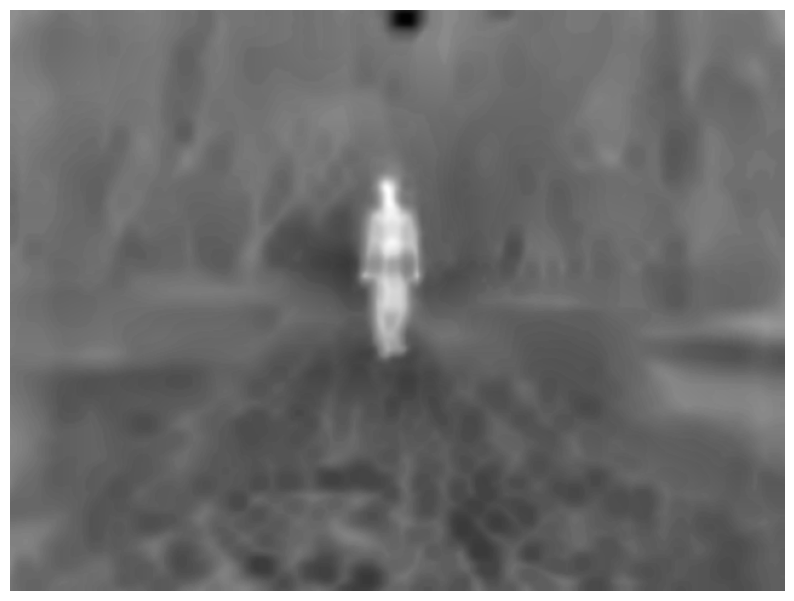

In [6]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Training YOLO v11m Model

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv11 model (nano version)
model = YOLO('yolo11m.pt')

# Train the model
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml",  
    epochs=100,
    imgsz=640,
    batch=16,
    name='train11m',  # subfolder name under yolov11_rgb
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir",
    workers=4,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.122 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir, name=train11m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer

train: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train.cache... 22096 images, 1421 backgrounds, 0 corrupt: 100%|██████████| 22096/22096 [00:00<?, ?it/s]
val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val.cache... 6313 images, 392 backgrounds, 0 corrupt: 100%|██████████| 6313/6313 [00:00<?, ?it/s]


Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.59G      1.436      1.275      1.134        115        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:45<00:00,  4.34it/s]


                   all       6313      22790      0.892      0.657      0.712      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.48G      1.333     0.8279      1.092         86        640: 100%|██████████| 1381/1381 [04:54<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:45<00:00,  4.31it/s]


                   all       6313      22790      0.901       0.65       0.71      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.52G       1.37     0.8841      1.121         96        640: 100%|██████████| 1381/1381 [04:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:46<00:00,  4.28it/s]


                   all       6313      22790      0.848      0.609      0.669      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.46G      1.367     0.8884      1.137         64        640: 100%|██████████| 1381/1381 [04:46<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:46<00:00,  4.30it/s]


                   all       6313      22790      0.889      0.677      0.726      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.59G      1.306     0.8099      1.118        135        640: 100%|██████████| 1381/1381 [04:46<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:44<00:00,  4.41it/s]


                   all       6313      22790      0.749      0.698      0.743       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       8.5G      1.258     0.7532      1.099        177        640: 100%|██████████| 1381/1381 [04:54<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:45<00:00,  4.38it/s]


                   all       6313      22790      0.773        0.8      0.795      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.56G      1.226     0.7198      1.089         75        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:44<00:00,  4.41it/s]

                   all       6313      22790      0.812      0.761      0.805      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.48G      1.199     0.6938      1.073         99        640: 100%|██████████| 1381/1381 [04:53<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:45<00:00,  4.40it/s]

                   all       6313      22790      0.836      0.777      0.819      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       8.5G      1.172     0.6734      1.067         78        640: 100%|██████████| 1381/1381 [04:53<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:44<00:00,  4.47it/s]

                   all       6313      22790      0.818        0.8      0.814       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.53G      1.154     0.6508      1.055         83        640: 100%|██████████| 1381/1381 [04:47<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:44<00:00,  4.48it/s]

                   all       6313      22790      0.887      0.788      0.831      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.56G      1.137     0.6385       1.05        111        640: 100%|██████████| 1381/1381 [04:54<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.63it/s]

                   all       6313      22790      0.863      0.827       0.84        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.52G      1.113     0.6209      1.043         78        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:43<00:00,  4.59it/s]

                   all       6313      22790      0.856      0.796      0.841      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.56G      1.106      0.611      1.038        107        640: 100%|██████████| 1381/1381 [04:49<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.65it/s]

                   all       6313      22790      0.888       0.79      0.838      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.54G      1.097     0.6021      1.039         85        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.70it/s]

                   all       6313      22790      0.893      0.827      0.851       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.56G      1.079     0.5868       1.03        100        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.71it/s]

                   all       6313      22790       0.91      0.805      0.849      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.48G      1.067     0.5773      1.025        126        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.67it/s]

                   all       6313      22790      0.894      0.813      0.852       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.55G      1.055     0.5715      1.021         60        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.71it/s]

                   all       6313      22790      0.881      0.811      0.849      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.51G      1.044     0.5627      1.015        133        640: 100%|██████████| 1381/1381 [04:55<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.67it/s]

                   all       6313      22790      0.914      0.819      0.859      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.55G       1.04     0.5581      1.015         82        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.70it/s]

                   all       6313      22790      0.911      0.815       0.86      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.45G      1.025     0.5472      1.011        130        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.66it/s]

                   all       6313      22790      0.887      0.836      0.861      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.56G      1.021     0.5411       1.01         69        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.81it/s]

                   all       6313      22790      0.918      0.826      0.858      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.53G      1.016     0.5374      1.006        138        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.74it/s]

                   all       6313      22790       0.92      0.837       0.86      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.49G      1.006      0.533      1.005        124        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.915       0.84      0.864      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.52G      1.001     0.5265      1.002         68        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.68it/s]

                   all       6313      22790      0.895      0.845      0.864      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.51G     0.9966      0.523     0.9982         61        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.917      0.846      0.868      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.53G      0.989     0.5174     0.9947        113        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.917       0.84      0.867      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.51G     0.9785     0.5098     0.9904        115        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.78it/s]

                   all       6313      22790      0.928      0.833      0.869      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.51G     0.9733     0.5074     0.9896         75        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.75it/s]

                   all       6313      22790       0.89       0.85      0.872      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.58G     0.9641      0.502      0.986        115        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.77it/s]

                   all       6313      22790      0.921       0.85       0.87      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.49G     0.9581      0.496     0.9879         84        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.81it/s]

                   all       6313      22790      0.925      0.843      0.872       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.54G     0.9477     0.4931     0.9785         89        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.81it/s]

                   all       6313      22790       0.94      0.848      0.875      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.51G     0.9458      0.489     0.9813         80        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.85it/s]

                   all       6313      22790      0.928      0.846      0.875      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.5G     0.9439     0.4878     0.9807        155        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.76it/s]

                   all       6313      22790      0.931      0.845      0.876      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.52G     0.9417     0.4857     0.9756        135        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.924      0.845      0.875      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.52G     0.9322     0.4808     0.9738         93        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.78it/s]

                   all       6313      22790      0.926      0.849      0.875      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.52G     0.9278     0.4782     0.9734         75        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.78it/s]

                   all       6313      22790      0.925      0.843      0.876      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.54G     0.9236     0.4742     0.9713        132        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.78it/s]

                   all       6313      22790      0.924      0.841      0.876      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.56G     0.9181     0.4703     0.9703         95        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.76it/s]

                   all       6313      22790      0.927      0.839      0.876      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.53G     0.9149     0.4686      0.969         95        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.74it/s]

                   all       6313      22790      0.914      0.854      0.877      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.49G     0.9074     0.4635     0.9685        105        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.73it/s]

                   all       6313      22790      0.921      0.852      0.877      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.55G     0.9027     0.4615     0.9643        100        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.82it/s]

                   all       6313      22790      0.919      0.852      0.877      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.52G      0.898     0.4556      0.962         77        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.73it/s]

                   all       6313      22790      0.919      0.852      0.877      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.55G     0.8918     0.4544     0.9602        145        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.76it/s]

                   all       6313      22790      0.922      0.849      0.877      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.52G     0.8879     0.4548     0.9583         62        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.73it/s]

                   all       6313      22790      0.919      0.852      0.877      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.61G     0.8799       0.45     0.9557         55        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.80it/s]

                   all       6313      22790       0.92      0.851      0.877      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.51G     0.8778      0.447     0.9563        105        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.919      0.851      0.877      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.53G     0.8721     0.4439     0.9538         71        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.79it/s]

                   all       6313      22790      0.919      0.851      0.877      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       8.5G     0.8668     0.4412     0.9496         88        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.71it/s]

                   all       6313      22790      0.918      0.851      0.877       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.52G     0.8632     0.4382     0.9443         63        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.916      0.853      0.877       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.51G      0.859     0.4355     0.9495        139        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.71it/s]

                   all       6313      22790      0.915      0.854      0.877      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.52G     0.8553     0.4329     0.9441         93        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.73it/s]

                   all       6313      22790      0.916      0.853      0.877      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.49G     0.8502     0.4291     0.9407         96        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:42<00:00,  4.68it/s]

                   all       6313      22790      0.917      0.852      0.877      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.53G     0.8408     0.4258     0.9431         93        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.73it/s]

                   all       6313      22790      0.916      0.853      0.878      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.55G     0.8411     0.4248     0.9412        120        640: 100%|██████████| 1381/1381 [04:55<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.72it/s]

                   all       6313      22790      0.916      0.853      0.878      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       8.5G     0.8376     0.4208     0.9387        152        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.76it/s]

                   all       6313      22790      0.916      0.853      0.878      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.48G     0.8368      0.421     0.9394         88        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.79it/s]

                   all       6313      22790      0.915      0.853      0.878      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.56G     0.8263     0.4154     0.9339        100        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.83it/s]

                   all       6313      22790      0.917      0.853      0.878      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.56G     0.8246      0.416      0.935        112        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.74it/s]

                   all       6313      22790      0.918      0.852      0.879      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.52G     0.8178     0.4118     0.9346         97        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.87it/s]

                   all       6313      22790      0.919      0.851      0.879      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.51G     0.8139     0.4092     0.9325         67        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.78it/s]

                   all       6313      22790      0.918      0.852      0.879      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.51G     0.8164     0.4087      0.932        114        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.80it/s]

                   all       6313      22790       0.92      0.851      0.879      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.52G     0.8073     0.4047     0.9293         54        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.76it/s]

                   all       6313      22790       0.92      0.851      0.879      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.54G      0.803      0.401      0.925         81        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.77it/s]

                   all       6313      22790       0.92      0.851       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       8.7G     0.8014     0.3999     0.9245         98        640: 100%|██████████| 1381/1381 [04:50<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.75it/s]

                   all       6313      22790       0.92      0.852       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.55G     0.7965     0.3968     0.9241        104        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.85it/s]

                   all       6313      22790      0.922       0.85       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.52G     0.7878     0.3935     0.9219         88        640: 100%|██████████| 1381/1381 [04:56<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.82it/s]

                   all       6313      22790      0.925      0.848       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.57G     0.7886     0.3934     0.9214         89        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.85it/s]

                   all       6313      22790      0.927      0.847      0.881      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.54G     0.7805     0.3884      0.919         99        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:41<00:00,  4.82it/s]

                   all       6313      22790      0.933      0.845      0.881      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.48G     0.7768     0.3863     0.9174        138        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.84it/s]

                   all       6313      22790      0.937      0.846      0.881      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.49G      0.768      0.382      0.917        134        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.84it/s]

                   all       6313      22790      0.936      0.845      0.881      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.56G     0.7682     0.3812     0.9163        104        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.89it/s]

                   all       6313      22790      0.932      0.845      0.881      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.45G     0.7699     0.3817     0.9153        127        640: 100%|██████████| 1381/1381 [05:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.85it/s]

                   all       6313      22790      0.929      0.848      0.882      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.52G     0.7586     0.3752     0.9121         95        640: 100%|██████████| 1381/1381 [04:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.89it/s]

                   all       6313      22790      0.926       0.85      0.886        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.57G     0.7568     0.3752     0.9126         91        640: 100%|██████████| 1381/1381 [04:57<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.87it/s]

                   all       6313      22790      0.925       0.85      0.886      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.55G     0.7522     0.3722     0.9098        113        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:40<00:00,  4.87it/s]

                   all       6313      22790      0.924      0.851      0.882      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.54G      0.743     0.3678     0.9076         90        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  4.97it/s]

                   all       6313      22790      0.923      0.851      0.882      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.51G     0.7423     0.3688     0.9067         99        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.02it/s]

                   all       6313      22790      0.924      0.852      0.882      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       8.5G     0.7381     0.3629     0.9051        110        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.01it/s]

                   all       6313      22790      0.924      0.853      0.882      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.51G     0.7276     0.3594     0.9003         94        640: 100%|██████████| 1381/1381 [05:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.03it/s]

                   all       6313      22790      0.923      0.853      0.882      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.49G     0.7288     0.3587     0.9011        123        640: 100%|██████████| 1381/1381 [05:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.00it/s]

                   all       6313      22790      0.924      0.854      0.882      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.56G     0.7257     0.3561     0.9004        148        640: 100%|██████████| 1381/1381 [05:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.08it/s]

                   all       6313      22790      0.924      0.854      0.882      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.61G     0.7186      0.354     0.8993         72        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  4.95it/s]

                   all       6313      22790      0.925      0.855      0.882      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.58G     0.7111      0.349     0.8962        135        640: 100%|██████████| 1381/1381 [04:53<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.01it/s]

                   all       6313      22790      0.925      0.855      0.883      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.46G     0.7063     0.3482      0.895         78        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.03it/s]

                   all       6313      22790      0.924      0.857      0.883      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.52G     0.7017     0.3461     0.8937         77        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  4.96it/s]

                   all       6313      22790      0.925      0.856      0.883      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.58G     0.6977     0.3429     0.8914         83        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  4.99it/s]

                   all       6313      22790      0.926      0.856      0.883      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.55G     0.6946     0.3414     0.8924        101        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.09it/s]

                   all       6313      22790      0.926      0.856      0.883      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.49G     0.6905     0.3393     0.8908         93        640: 100%|██████████| 1381/1381 [05:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.08it/s]

                   all       6313      22790      0.927      0.856      0.883      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.54G     0.6844     0.3357     0.8884         82        640: 100%|██████████| 1381/1381 [04:59<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.11it/s]

                   all       6313      22790      0.926      0.857      0.883      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.52G     0.6813     0.3331     0.8875         60        640: 100%|██████████| 1381/1381 [05:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.13it/s]

                   all       6313      22790      0.926      0.857      0.882      0.706


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.51G     0.6481     0.3063     0.8765         43        640: 100%|██████████| 1381/1381 [04:53<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.09it/s]

                   all       6313      22790      0.926      0.857      0.882      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.46G     0.6353     0.2997     0.8712         63        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.05it/s]

                   all       6313      22790      0.926      0.857      0.883      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.56G     0.6281     0.2955     0.8722         33        640: 100%|██████████| 1381/1381 [04:53<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:38<00:00,  5.12it/s]

                   all       6313      22790      0.927      0.857      0.882      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.53G     0.6194      0.292     0.8719         62        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.00it/s]

                   all       6313      22790      0.926      0.857      0.883      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.55G     0.6151       0.29     0.8676         68        640: 100%|██████████| 1381/1381 [04:58<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  4.97it/s]

                   all       6313      22790      0.926      0.858      0.883      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.49G     0.6098     0.2868     0.8626         81        640: 100%|██████████| 1381/1381 [05:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:39<00:00,  5.04it/s]

                   all       6313      22790      0.926      0.858      0.883      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.56G     0.6029     0.2838     0.8623         58        640: 100%|██████████| 1381/1381 [04:52<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.12it/s]

                   all       6313      22790      0.926      0.858      0.883      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.51G     0.5957     0.2799     0.8631         49        640: 100%|██████████| 1381/1381 [02:55<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:13<00:00, 14.30it/s]

                   all       6313      22790      0.927      0.858      0.884       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.53G      0.593     0.2776     0.8601         60        640: 100%|██████████| 1381/1381 [02:24<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:14<00:00, 14.11it/s]

                   all       6313      22790      0.927      0.858      0.884       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.49G     0.5884     0.2757     0.8574         50        640: 100%|██████████| 1381/1381 [02:24<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:13<00:00, 14.31it/s]

                   all       6313      22790      0.928      0.858      0.884       0.71



100 epochs completed in 9.225 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m/weights/last.pt, 40.5MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m/weights/best.pt, 40.5MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11m summary (fused): 303 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:14<00:00, 14.06it/s]


                   all       6313      22790      0.928      0.858      0.884       0.71
                Person       4194      12644      0.974      0.964      0.988      0.795
                   Car       1183       4435      0.889        0.9       0.95      0.738
         Vehicle_Other       1824       3067      0.987      0.983      0.994      0.952
                   JCB       1314       1314          1          1      0.995      0.945
           Two_Wheeler        363       1298      0.928      0.893      0.949      0.613
             Dont_Care         19         32      0.788      0.406       0.43      0.219
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m


## Testing YOLO v11m Model

In [8]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11m/weights/best.pt')

# Evaluate on test set
metrics = model.val(
    split='test',
    name='test11m',  #  separate subfolder for test
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir"
)

# Print test metrics
print(metrics)

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)


YOLO11m summary (fused): 303 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test.cache... 3157 images, 194 backgrounds, 0 corrupt: 100%|██████████| 3157/3157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:10<00:00, 18.58it/s]


                   all       3157      11975      0.957      0.914      0.955      0.773
                Person       2123       6587      0.977      0.957      0.989      0.795
                   Car        572       2335       0.89      0.898      0.958      0.745
         Vehicle_Other        966       1618      0.986      0.985      0.994      0.957
                   JCB        683        683      0.999          1      0.995      0.947
           Two_Wheeler        175        739       0.93      0.875      0.951      0.584
             Dont_Care          9         13      0.962      0.769      0.845      0.608
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/test11m
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix 

## Load Pretrained YOLO v11x model and Validate

In [9]:
from ultralytics import YOLO
from PIL import Image

# Load the YOLO model
model = YOLO('yolo11x.pt')

# Open the local image file
image = Image.open(r'/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/images/test/flir_2208.jpg')

# Perform prediction
result = model.predict(image, conf=0.25)[0]


0: 480x640 (no detections), 24.8ms
Speed: 0.6ms preprocess, 24.8ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


In [10]:
result.boxes.xyxy

tensor([], device='cuda:0', size=(0, 4))

In [11]:
result.boxes.conf

tensor([], device='cuda:0')

In [12]:
result.boxes.cls

tensor([], device='cuda:0')

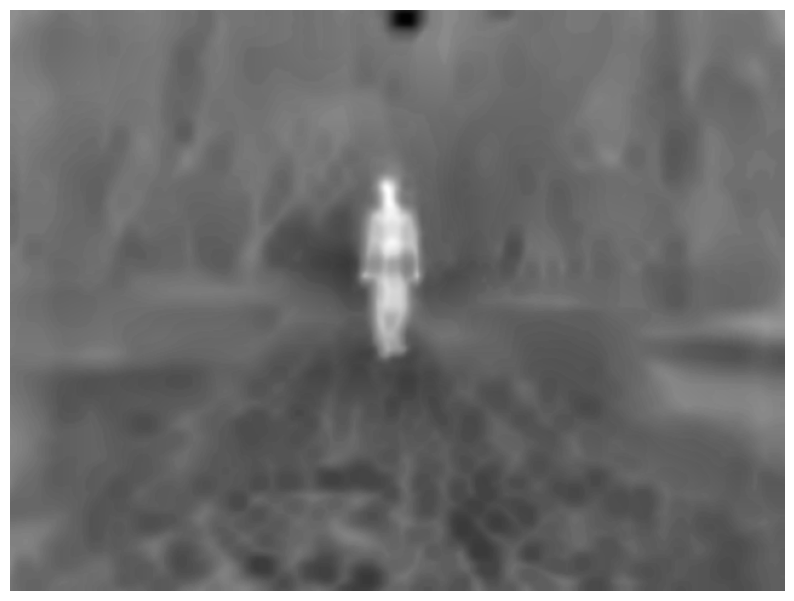

In [13]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Training YOLO v11x Model

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv11 model (x version)
model = YOLO('yolo11x.pt')

# Train the model
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml",  
    epochs=100,
    imgsz=640,
    batch=16,
    name='train11x',  # subfolder name under yolov11_rgb
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir",
    workers=4,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.123 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir, name=train11x, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer

train: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train.cache... 22096 images, 1421 backgrounds, 0 corrupt: 100%|██████████| 22096/22096 [00:00<?, ?it/s]
val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val.cache... 6313 images, 392 backgrounds, 0 corrupt: 100%|██████████| 6313/6313 [00:00<?, ?it/s]


Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      16.5G      1.397      1.111      1.173        115        640: 100%|██████████| 1381/1381 [05:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  7.97it/s]


                   all       6313      22790      0.884      0.659      0.712      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      16.2G      1.306     0.7852      1.117         86        640: 100%|██████████| 1381/1381 [05:12<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  7.94it/s]


                   all       6313      22790      0.865      0.652      0.692       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      16.4G      1.361     0.8533      1.157         96        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790       0.84      0.614      0.661       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      16.2G      1.356     0.8582      1.183         64        640: 100%|██████████| 1381/1381 [05:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.91it/s]


                   all       6313      22790      0.885      0.667      0.719      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      16.4G      1.292     0.7801      1.159        135        640: 100%|██████████| 1381/1381 [05:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.831      0.721      0.768      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      16.4G      1.241     0.7183      1.141        177        640: 100%|██████████| 1381/1381 [05:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.909      0.712      0.797      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      16.4G      1.208     0.6821      1.129         75        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.837      0.749      0.793      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      16.2G      1.182     0.6603      1.118         99        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.90it/s]


                   all       6313      22790      0.879      0.777      0.821      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      16.4G      1.153     0.6394      1.108         78        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.834      0.791      0.822       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.4G      1.132     0.6157      1.097         83        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.886      0.802      0.835      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      16.4G      1.113     0.6024      1.093        111        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.913      0.807      0.845       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      16.2G      1.089     0.5841      1.082         78        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.898      0.804      0.842      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      16.4G       1.08     0.5739       1.08        107        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.897      0.804      0.845      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      16.4G       1.07     0.5641      1.071         85        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790       0.91      0.816      0.849      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      16.4G      1.053     0.5509      1.065        100        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.897      0.809      0.848      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      16.2G      1.039     0.5423      1.058        126        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.80it/s]


                   all       6313      22790      0.911      0.812      0.856      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      16.4G      1.029     0.5359      1.054         60        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.906      0.817      0.852      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      16.4G      1.017     0.5277      1.045        133        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.911      0.813      0.854      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      16.4G      1.013     0.5214      1.051         82        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.929      0.833      0.862      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.2G      0.998      0.509      1.043        130        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.921       0.82      0.861       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      16.4G     0.9925     0.5051       1.04         69        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.922      0.831      0.859      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      16.4G     0.9846     0.5011      1.036        138        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.919      0.832      0.864      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      16.4G     0.9729     0.4959      1.032        124        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790       0.93      0.837       0.87      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.2G      0.968     0.4911       1.03         68        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790       0.91      0.843      0.866      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      16.4G     0.9631     0.4883      1.028         61        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.922      0.855      0.871      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      16.4G     0.9569     0.4837      1.024        113        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790       0.93      0.847      0.873      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      16.4G     0.9476     0.4771       1.02        115        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.924      0.856      0.879      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      16.2G     0.9367     0.4712      1.019         75        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.921      0.851      0.878      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      16.4G     0.9302      0.468      1.012        115        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.937      0.841      0.874      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      16.4G     0.9239     0.4632      1.012         84        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.935      0.851      0.876      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      16.4G     0.9115     0.4569      1.003         89        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.935       0.85      0.877      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      16.2G     0.9108     0.4547      1.006         80        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.931       0.85      0.875      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      16.4G     0.9079     0.4519      1.004        155        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.937      0.846      0.877      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      16.4G     0.9042     0.4517     0.9997        135        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.936      0.849      0.878      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      16.4G     0.8945     0.4443     0.9991         93        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.938      0.848      0.876      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      16.2G     0.8903     0.4417     0.9971         75        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.91it/s]


                   all       6313      22790      0.941      0.851      0.874      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      16.4G     0.8856     0.4393     0.9956        132        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.917      0.861      0.877      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      16.4G     0.8806     0.4355     0.9916         95        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.923      0.856      0.878      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      16.4G     0.8765     0.4342      0.992         95        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.939      0.854      0.878      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      16.2G     0.8695     0.4283     0.9886        105        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.943      0.852      0.881      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      16.4G     0.8649     0.4276     0.9854        100        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.946      0.848      0.883      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      16.4G     0.8586     0.4215     0.9826         77        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.943      0.847      0.882      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      16.4G      0.853       0.42     0.9796        145        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.937      0.849      0.883      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      16.2G     0.8498     0.4183     0.9786         62        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.936       0.85      0.882      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      16.3G     0.8412     0.4143      0.978         55        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.934      0.851      0.882      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      16.4G     0.8415      0.414     0.9767        105        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.935      0.851      0.881      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      16.4G     0.8336     0.4101     0.9733         71        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.90it/s]


                   all       6313      22790      0.937      0.851      0.881      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      16.2G     0.8267      0.406      0.971         88        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.852      0.882      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      16.4G     0.8225     0.4033     0.9678         63        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.83it/s]


                   all       6313      22790      0.938      0.852      0.882      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      16.4G     0.8218      0.402     0.9692        139        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.83it/s]


                   all       6313      22790      0.938      0.853      0.883      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      16.4G     0.8141     0.3995     0.9638         93        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.938      0.852      0.884        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      16.2G     0.8075     0.3947     0.9622         96        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.852      0.884      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      16.4G     0.8003     0.3929     0.9609         93        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.937      0.852      0.885      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      16.4G     0.7989     0.3917     0.9568        120        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.853      0.885      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      16.4G     0.7961     0.3899     0.9581        152        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.936      0.853      0.885      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      16.2G      0.794      0.387     0.9551         88        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.936      0.854      0.885      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      16.4G     0.7826     0.3819     0.9502        100        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.937      0.853      0.885      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      16.4G     0.7799     0.3819     0.9518        112        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.937      0.853      0.885      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      16.4G     0.7747     0.3783     0.9496         97        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.938      0.851      0.886      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      16.2G     0.7702     0.3758     0.9452         67        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.938      0.851      0.885      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      16.4G     0.7701     0.3753     0.9451        114        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.852      0.886      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      16.4G     0.7625     0.3712     0.9454         54        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.938      0.851      0.886      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      16.4G     0.7569     0.3665     0.9407         81        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.82it/s]


                   all       6313      22790      0.939      0.851      0.886      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.2G     0.7546     0.3666     0.9408         98        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.81it/s]


                   all       6313      22790       0.94       0.85      0.887      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.4G     0.7468     0.3621     0.9377        104        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790       0.94      0.849      0.887      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      16.4G     0.7398     0.3586     0.9352         88        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.942      0.848      0.887      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      16.4G     0.7391     0.3582     0.9369         89        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.942      0.848      0.887      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      16.2G     0.7316     0.3527     0.9326         99        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.941      0.848      0.887      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      16.4G     0.7266     0.3513     0.9326        138        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790       0.94      0.848      0.888      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      16.4G     0.7161     0.3448     0.9285        134        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.939      0.847      0.888      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      16.4G     0.7166     0.3458      0.928        104        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.939      0.847      0.888      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      16.2G     0.7187     0.3464      0.928        127        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.938      0.847      0.888       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      16.4G     0.7086     0.3405     0.9246         95        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.937      0.848      0.889      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      16.3G     0.7063     0.3414     0.9239         91        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.936      0.848      0.889      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      16.3G     0.6997     0.3375     0.9201        113        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.935      0.848      0.889      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      16.2G     0.6912     0.3337     0.9176         90        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.935      0.848      0.889      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      16.4G     0.6902     0.3324     0.9149         99        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.935      0.848       0.89      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      16.4G     0.6839     0.3282     0.9146        110        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.935      0.848       0.89      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      16.4G     0.6725      0.325     0.9102         94        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.935      0.847      0.888      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      16.2G     0.6728     0.3234     0.9104        123        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.935      0.847      0.888      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      16.4G     0.6693     0.3205     0.9113        148        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.934      0.848      0.888      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      16.3G     0.6616     0.3185     0.9075         72        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.934      0.848      0.889      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      16.4G     0.6553      0.314     0.9058        135        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.82it/s]


                   all       6313      22790      0.935      0.848       0.89      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      16.2G     0.6487      0.312     0.9013         78        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.935      0.847      0.889      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      16.4G     0.6432     0.3102     0.9007         77        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.935      0.847      0.889      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      16.4G     0.6397     0.3069     0.8999         83        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.936      0.847      0.889      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      16.4G     0.6362     0.3071     0.8997        101        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.936      0.847      0.889      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      16.2G     0.6303     0.3028     0.8967         93        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.83it/s]


                   all       6313      22790      0.936      0.847       0.89      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      16.4G     0.6246     0.3004     0.8958         82        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.84it/s]


                   all       6313      22790      0.936      0.847       0.89      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      16.4G     0.6194     0.2972     0.8921         60        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.936      0.848       0.89      0.718
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      16.4G     0.5853     0.2714     0.8934         43        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.86it/s]


                   all       6313      22790      0.936      0.847      0.891      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      16.2G     0.5752      0.266     0.8881         63        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.847      0.891      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      16.4G     0.5666     0.2622     0.8848         33        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.937      0.846      0.891      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      16.4G     0.5569     0.2587     0.8837         62        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.85it/s]


                   all       6313      22790      0.937      0.846       0.89       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      16.4G     0.5527     0.2564     0.8819         68        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.938      0.846       0.89      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      16.2G     0.5466     0.2545     0.8767         81        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.938      0.845      0.892      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      16.4G     0.5386     0.2509     0.8751         58        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.89it/s]


                   all       6313      22790      0.897      0.867      0.892      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      16.4G     0.5322     0.2482     0.8724         49        640: 100%|██████████| 1381/1381 [05:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.898      0.867      0.896      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      16.4G     0.5281     0.2459     0.8724         60        640: 100%|██████████| 1381/1381 [05:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.80it/s]


                   all       6313      22790      0.895      0.873      0.896      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      16.2G     0.5242     0.2445      0.869         50        640: 100%|██████████| 1381/1381 [05:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.10it/s]


                   all       6313      22790      0.913      0.861      0.896      0.724

100 epochs completed in 9.367 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x/weights/last.pt, 114.4MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x/weights/best.pt, 114.4MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11x summary (fused): 464 layers, 56,833,954 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.27it/s]


                   all       6313      22790      0.913      0.861      0.896      0.725
                Person       4194      12644      0.972      0.967      0.988      0.809
                   Car       1183       4435      0.888      0.902      0.953      0.745
         Vehicle_Other       1824       3067      0.984      0.984      0.994      0.955
                   JCB       1314       1314          1          1      0.995      0.949
           Two_Wheeler        363       1298       0.92      0.908       0.95      0.629
             Dont_Care         19         32      0.715      0.406      0.495      0.261
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x


## Testing YOLO v11x Model

In [3]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/train11x/weights/best.pt')

# Evaluate on test set
metrics = model.val(
    split='test',
    name='test11x',  #  separate subfolder for test
    project="/home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir"
)

# Print test metrics
print(metrics)

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11x summary (fused): 464 layers, 56,833,954 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test.cache... 3157 images, 194 backgrounds, 0 corrupt: 100%|██████████| 3157/3157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:20<00:00,  9.84it/s]


                   all       3157      11975      0.948      0.916      0.952      0.768
                Person       2123       6587      0.978      0.959       0.99      0.813
                   Car        572       2335      0.891      0.907      0.956      0.749
         Vehicle_Other        966       1618      0.988      0.988      0.994       0.96
                   JCB        683        683      0.999          1      0.995      0.946
           Two_Wheeler        175        739      0.934       0.87      0.941      0.589
             Dont_Care          9         13      0.895      0.769      0.838      0.553
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/yolov11_ir/test11x
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix 